In [22]:
import sys, os
from ephys import rasters, core, events
import matplotlib.pyplot as plt
import numpy as np
%pylab inline
from importlib import reload
reload(rasters)

Populating the interactive namespace from numpy and matplotlib


<module 'ephys.rasters' from '/usr/local/home/mturvey/Code/ephys-analysis/ephys/rasters.py'>

In [7]:
block_path = '/mnt/cube/nyoni-raw/test_data/201901300906-B970-block-9-AP-1250-ML-750-Z-1750/'

spikes = core.load_spikes(block_path)
trials = events.oe_load_trials(block_path)
fs = core.load_fs(block_path)
clusters = core.load_clusters(block_path)

In [9]:
stims = trials['stimulus'].unique()
print(len(stims))
print(clusters)
print(spikes)
print(trials)

1
    cluster   quality
0         1  unsorted
1         2  unsorted
2         3  unsorted
3         4  unsorted
4         5  unsorted
5         6  unsorted
6         7  unsorted
7         8  unsorted
8         9  unsorted
9        10  unsorted
10       11  unsorted
11       12  unsorted
12       13  unsorted
13       14  unsorted
14       15  unsorted
15       16  unsorted
16       17  unsorted
17       18  unsorted
18       19  unsorted
19       20  unsorted
20       21  unsorted
21       22  unsorted
22       23  unsorted
23       24  unsorted
24       25  unsorted
25       26  unsorted
26       27  unsorted
27       28  unsorted
28       29  unsorted
29       30  unsorted
30       31  unsorted
31       32  unsorted
32       33  unsorted
33       34  unsorted
34       35  unsorted
35       36  unsorted
36       37  unsorted
37       38  unsorted
38       39  unsorted
39       40  unsorted
40       41  unsorted
41       42  unsorted
42       43  unsorted
       cluster  recording  tim

In [10]:
len(stims)

1

In [6]:
goodclus = clusters[clusters['quality']=='Good']
goodspikes = spikes[spikes['cluster']==43]
print goodclus
print goodspikes

Empty DataFrame
Columns: [cluster, quality]
Index: []
       cluster  recording  time_samples
70          43          0          1486
125         43          0          2760
164         43          0          3462
212         43          0          4488
275         43          0          5856
324         43          0          6852
331         43          0          6997
592         43          0         12421
623         43          0         13035
661         43          0         13884
668         43          0         14058
706         43          0         14976
813         43          0         17372
861         43          0         18436
871         43          0         18643
1000        43          0         21602
1040        43          0         22466
1244        43          0         26895
1267        43          0         27416
1282        43          0         27718
1287        43          0         27807
1363        43          0         29532
1374        43          0 

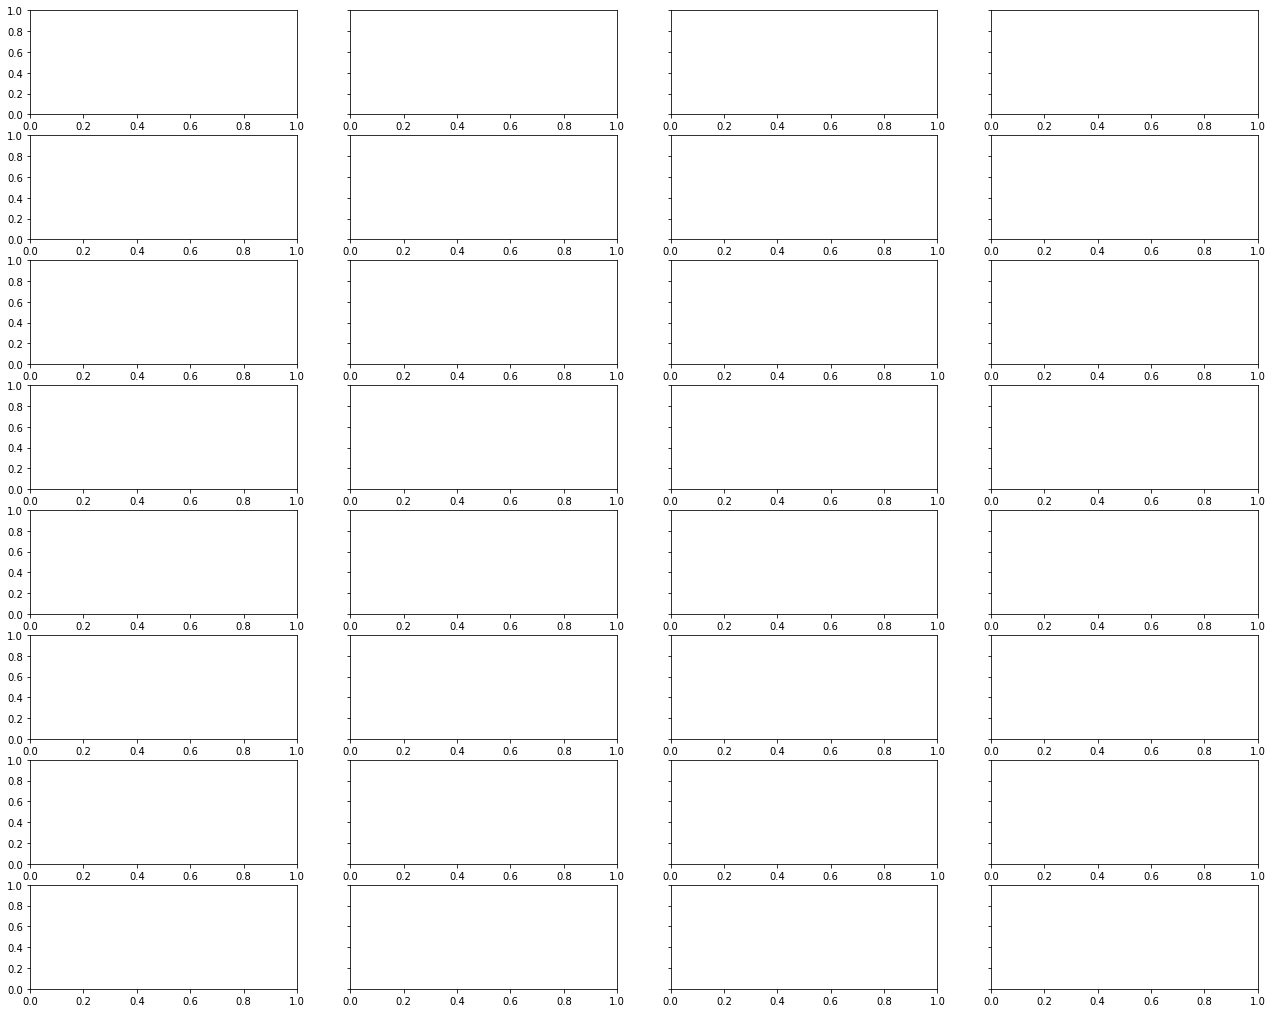

In [10]:
f, pltaxes = plt.subplots(8, 4, sharey=True, figsize=(22,18))

clusterID = 36
raster_window = [-2, 2]
cluspikes = spikes[spikes['cluster']==clusterID]
clurecs = np.array(cluspikes['recording'])


In [13]:
for ind, rec in enumerate(clurecs):
    ax = pltaxes.flatten()[ind]
    stim = trials[trials['recording']==clurecs]['stimulus'][0]
    rasters.plot_raster_cell_stim(spikes, trials, clusterID, stim,
                                  raster_window, rec, fs, ax=ax)
    ax.set_title('Cell: {} Stim: {} Rec: {}'.format(clusterID, stim, rec))

KeyError: 'recording'

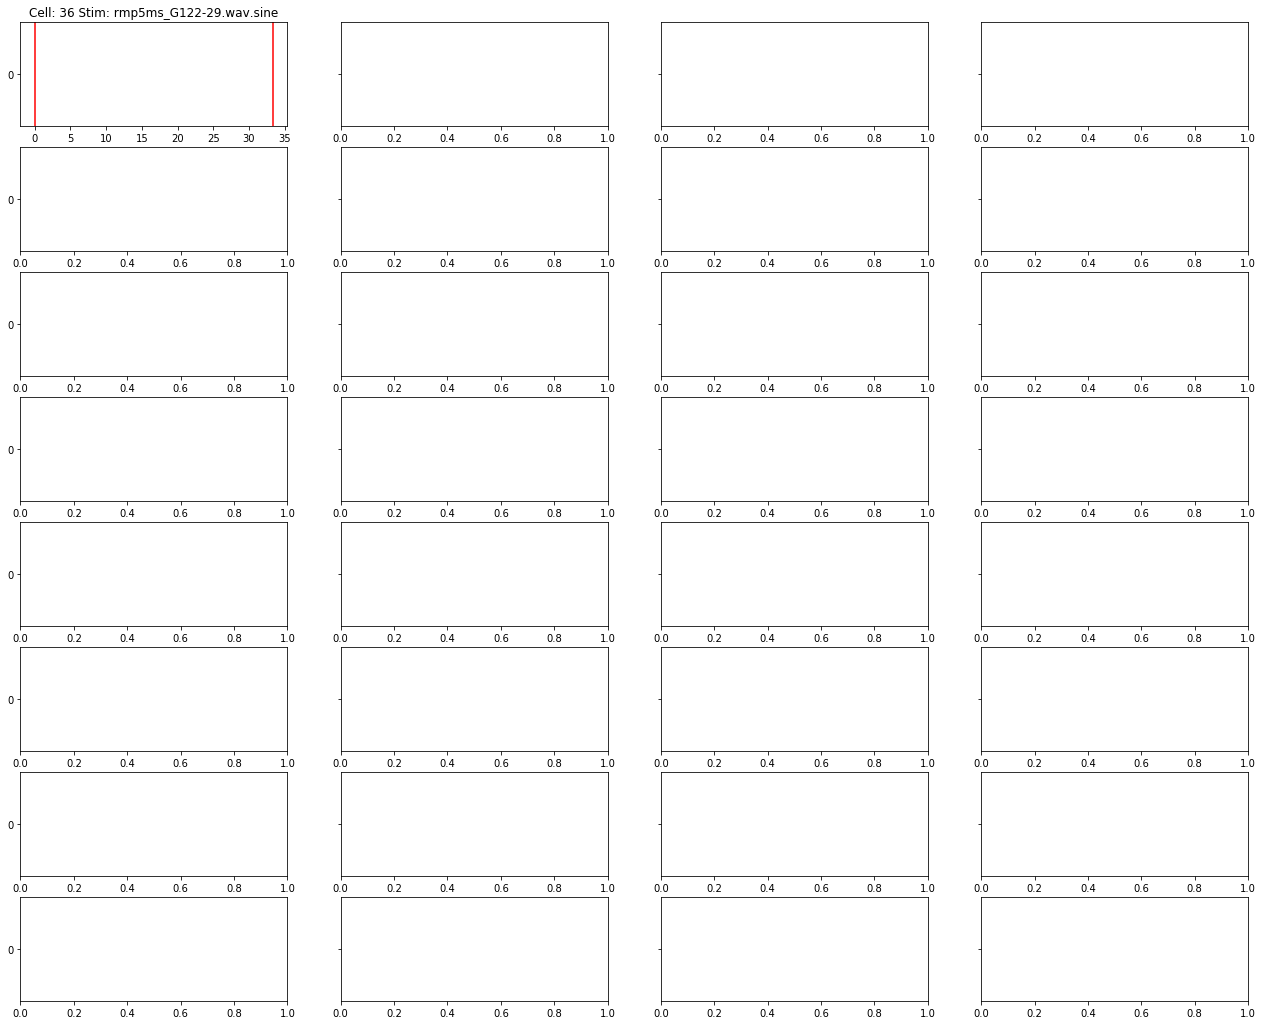

In [12]:
f, pltaxes = plt.subplots(8, 4, sharey=True, figsize=(22,18))
rec = 1
for ind, stim in enumerate(stims):
    ax = pltaxes.flatten()[ind]
    rasters.plot_raster_cell_stim(spikes, trials, clusterID, stim, 
                                  raster_window, rec, fs, ax=ax)
    ax.set_title('Cell: {} Stim: {}'.format(clusterID, stim))

In [ ]:
rasters.

In [55]:
import sys, os, tqdm
from ephys import rasters, core, events
import matplotlib.pyplot as plt
import numpy as np
%pylab inline
from importlib import reload
reload(rasters)

Populating the interactive namespace from numpy and matplotlib


<module 'ephys.rasters' from '/usr/local/home/mturvey/Code/ephys-analysis/ephys/rasters.py'>

In [ ]:
rasters.plot_all_rasters(block_path)

  0%|          | 0/1 [00:00<?, ?it/s]

In [53]:

def do_raster(raster_data, times, ticks, ntrials, ax=None, spike_linewidth=1.5,
              spike_color='k', tick_linewidth=1.5, tick_color='r'):
    '''
    Generalized raster plotting function
    Parameters
    ------
    raster_data : list of lists of floats
        List of lists.  Each sublist corresponds to one row of events
        Each element of a sublist is an event times
    times : list of floats
        The beginning and end times to plot
    ticks : list of floats
        Will add a vertical tick across the whole plot for each time in list
    ax : Matplotlib axes handle, optional
        Axes on which to produce raster. Default gca.
    spike_linewidth : float, optional
        width in points of ticks for spikes
    spike_color : str
        color of ticks for spikes
    tick_linewidth : float
        width in points of ticks for events
    tick_color  : str
        color of ticks for events
    Returns
    ------
    raster_plot :
        Handle to the raster plot
    '''
    raster_data = np.array(raster_data)
    if ax is None:
        ax = plt.gca()
    ax.set_xlim(times)
    ax.set_ylim((-0.5, ntrials-0.5))
    ax.set_yticks(range(0, ntrials))
    ax.eventplot(raster_data, linewidths=spike_linewidth, colors=spike_color)
    for pltticks in ticks:
        ax.axvline(pltticks, color=tick_color)
    return ax

def get_spiketrain(rec, samps, clu, spikes, window, fs):
    '''
    Returns a numpy array of spike times for a single cluster 
        within a window locked to a sampling time.
    
    Parameters
    ------
    rec : int
        the recording to look in
    samps : int
        the time to lock the spiketrain to in samples
    clu : int
        the cluster identifier to get spikes from
    spikes : pandas dataframe
        the pandas dataframe containing spikes (see core)
    window : tuple or list of floats
        the window around the event in seconds to sample spikes
    fs : float
        sampling rate of the recording
    
    Returns
    ------
    spike_train : numpy array of spike times in seconds
    '''
    bds = [w * fs + samps for w in window]

    window_mask = (
            (spikes['time_samples'] > bds[0])
            & (spikes['time_samples'] <= bds[1])
    )

    perievent_spikes = spikes[window_mask]

    mask = (
            (perievent_spikes['recording'] == rec)
            & (perievent_spikes['cluster'] == clu)
    )
    return (perievent_spikes['time_samples'][mask].values.astype(np.float_) - samps) / fs

def plot_raster_cell_stim(spikes, trials, clusterID,
                          stim, period, rec, fs, ax=None, stim_ref='stim', **kwargs):
    '''
    Plots a spike raster for a single cell and stimulus
    Parameters
    ------
    spikes : pandas dataframe
        spike dataframe from core
    trials : pandas dataframe
        trials dataframe from events
    clusterID : int
        ID number of the cluster you wish to make the raster for
    stim : str
        Name of the stimulus you wish to plot cluster's activity for
    period : list of floats
        Time window for the raster:
        [Seconds_pre_stimulus_onset, Seconds_post_stimulus_end]
    rec : int
        Recording ID
    fs : float
        Sampling rate
    plot_params : dict
        Drawing parameters:
        'spike_linewidth' - linewidth of ticks for spikes
        'tick_linewidth' - linewidth of ticks for event markers
        'spike_color' - color of spike ticks
        'tick_color' - color of event ticks
    ax : Matplotlib axes handle, optional
        Axes on which to produce the raster.  Default is to use gca
    kwargs :
        keyword arguments are passed to the do_raster method
    '''
    stim_trials = trials[trials['stimulus'] == stim]
    ntrials = len(stim_trials)
    stim_starts = stim_trials['time_samples'].values
    stim_ends = stim_trials['stimulus_end'].values
    stim_end_seconds = np.unique((stim_ends - stim_starts) / fs)[0]
    if stim_ref == 'stim':
        window = [period[0], stim_end_seconds + period[1]]
    elif stim_ref == 'abs':
        window = [period[0], period[1]]
    raster_data = []
    for trial, start in enumerate(stim_starts):
        sptrain = get_spiketrain(rec, start, clusterID, spikes, window, fs)
        raster_data.append(sptrain)
    ax = do_raster(raster_data, window, [0, stim_end_seconds], ntrials, ax, **kwargs)
    return ax

def plot_all_rasters_MT(block_path):
    ''' Plots all the rasters from all units for all stimuli 
        Places them in a blockpath/rasters folder
    '''
    rasters_folder = os.path.join(block_path, 'rasters/')
    spikes = core.load_spikes(block_path)
    trials = events.oe_load_trials(block_path)
    clusters = core.load_clusters(block_path)
    fs = core.load_fs(block_path)
    stims = np.unique(trials['stimulus'].values)

    os.makedirs(rasters_folder, exist_ok=True)
    for cluster in tqdm.tqdm(clusters["cluster"]):
        os.makedirs(os.path.join(rasters_folder, '{}/'.format(cluster)), exist_ok=True)
        for stim in tqdm.tqdm(stims):
            fig = plt.figure()
            ax = plot_raster_cell_stim(spikes, trials, cluster, stim, [-2, 2], 0, fs)
            ax.set_xlabel('Time (s)')
            ax.set_ylabel('Trial Number')
            ax.set_title('Unit: {}  Stimulus: {}'.format(cluster, stim))
            plt.savefig(os.path.join(rasters_folder, '{}/unit-{}_stim-{}.pdf'.format(cluster, cluster, stim)))
            plt.close(fig)

plot_all_rasters_MT(block_path)

100%|██████████| 43/43 [01:30<00:00,  2.04s/it]A


In [52]:
trials = events.oe_load_trials(block_path)
stims = np.unique(trials['stimulus'].values)
rasters_folder = os.path.join(block_path, 'rasters/')
print(rasters_folder)
clusters = core.load_clusters(block_path)
stims = np.unique(trials['stimulus'].values)

for cluster in clusters["cluster"]:
    for stim in stims:
        print(os.path.join(rasters_folder, '{}/unit-{}_stim-{}.pdf'.format(cluster, cluster, stim)))


/mnt/cube/nyoni-raw/test_data/201901300906-B970-block-9-AP-1250-ML-750-Z-1750/rasters/
/mnt/cube/nyoni-raw/test_data/201901300906-B970-block-9-AP-1250-ML-750-Z-1750/rasters/1/unit-1_stim-rmp5ms_G122-29.wav.sine.pdf
/mnt/cube/nyoni-raw/test_data/201901300906-B970-block-9-AP-1250-ML-750-Z-1750/rasters/2/unit-2_stim-rmp5ms_G122-29.wav.sine.pdf
/mnt/cube/nyoni-raw/test_data/201901300906-B970-block-9-AP-1250-ML-750-Z-1750/rasters/3/unit-3_stim-rmp5ms_G122-29.wav.sine.pdf
/mnt/cube/nyoni-raw/test_data/201901300906-B970-block-9-AP-1250-ML-750-Z-1750/rasters/4/unit-4_stim-rmp5ms_G122-29.wav.sine.pdf
/mnt/cube/nyoni-raw/test_data/201901300906-B970-block-9-AP-1250-ML-750-Z-1750/rasters/5/unit-5_stim-rmp5ms_G122-29.wav.sine.pdf
/mnt/cube/nyoni-raw/test_data/201901300906-B970-block-9-AP-1250-ML-750-Z-1750/rasters/6/unit-6_stim-rmp5ms_G122-29.wav.sine.pdf
/mnt/cube/nyoni-raw/test_data/201901300906-B970-block-9-AP-1250-ML-750-Z-1750/rasters/7/unit-7_stim-rmp5ms_G122-29.wav.sine.pdf
/mnt/cube/nyoni-r

In [51]:
clust=1
ex_stim="test.wav"
print(rasters_folder)
print(os.path.join(rasters_folder, '/{}/unit-{}_stim-{}.pdf'.format(1, 1, ex_stim)))


/mnt/cube/nyoni-raw/test_data/201901300906-B970-block-9-AP-1250-ML-750-Z-1750/rasters/
/1/unit-1_stim-test.wav.pdf


In [54]:
stims

array(['rmp5ms_G122-29.wav.sine'], dtype=object)